# Abhishek Kalekar 
Data Science Intern
Oasis Infobyte Internship

Problem:Email spam Detection with Machine Learning

# Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load Dataset

In [4]:
df = pd.read_csv("spam.csv", encoding='latin-1')


# View Dataset

In [5]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.tail()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


# Dataset Information

In [7]:
df.shape


(5572, 5)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Clean the Dataset

In [9]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']


# Check Missing Values

In [10]:
df.isnull().sum()





label      0
message    0
dtype: int64

# Convert Labels to Numerical

In [11]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


# Label Distribution

In [12]:
df['label'].value_counts()


label
0    4825
1     747
Name: count, dtype: int64

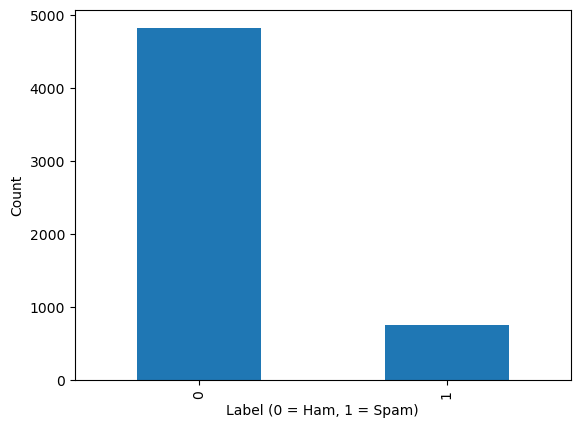

In [13]:
plt.figure()
df['label'].value_counts().plot(kind='bar')
plt.xlabel("Label (0 = Ham, 1 = Spam)")
plt.ylabel("Count")
plt.show()


# Text Preprocessing (Vectorization)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(df['message'])
y = df['label']


# Train-Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Train Naive Bayes Model

In [16]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

# Prediction

In [17]:
y_pred = model.predict(X_test)


# Model Evaluation

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.97847533632287


In [19]:
confusion_matrix(y_test, y_pred)


array([[952,  13],
       [ 11, 139]])

In [20]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



# Test with Custom Message

In [21]:
msg = ["Congratulations! You won a free prize"]
msg_vec = cv.transform(msg)
model.predict(msg_vec)


array([1])

# Conclusion Command

In [22]:
model.score(X_test, y_test)


0.97847533632287